# Customer Segmentation



This is a transnational data set that contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. 


### InvoiceNo: Invoice number.	
Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 

### StockCode: Product (item) code	
Nominal, a 5-digit integral number uniquely assigned to each distinct product.

### Description: Product (item) name	
Nominal.

### Quantity		
The quantities of each product (item) per transaction. Numeric.	

###  InvoiceDate: Invoice Date and time	 
Numeric, the day and time when each transaction was generated.

### UnitPrice		
Unit price. Numeric, Product price per unit in sterling. 

### CustomerID: Customer number	 
Nominal, a 5-digit integral number uniquely assigned to each customer.

### Country: Country name	
Nominal, the name of the country where each customer resides.


In [1]:
# Loading necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the dataset

df = pd.read_csv('data.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Checking the null values

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
# Shape of the data

df.shape

(541909, 8)

In [5]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# data description

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
df_uk = df[df['Country']=='United Kingdom']
df_uk.shape

(495478, 8)

In [8]:
#remove canceled orders

df_uk = df_uk[df_uk['Quantity']>0]
df_uk.shape

(486286, 8)

In [9]:
#Removing rows where customerID are NA

df_uk.dropna(subset=['CustomerID'],how='all',inplace=True)
df_uk.shape

(354345, 8)

In [10]:
#restrict the data to one full year because it's better to use a metric per Months or Years in RFM

df_uk = df_uk[df_uk['InvoiceDate']>= "2010-12-09"]
df_uk.shape

(176137, 8)

In [11]:
print("--------------Summary----------------")

#exploring the unique values of each attribute

print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products bought: ",df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df_uk['CustomerID'].isnull().sum() * 100 / len(df_uk),2),"%" )

--------------Summary----------------
Number of transactions:  8789
Number of products bought:  3294
Number of customers: 2864
Percentage of customers NA:  0.0 %


Perform RFM (Recency, Frequency, Monetary) analysis for each customer. Use these RFM columns to perform K-means clustering.

Hint: For each customer, you will have three columns (Recency, Frequency, Monetary) after the RFM analysis.

# Recency
To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [12]:
#last date available in our dataset

df_uk['InvoiceDate'].max()

'9/9/2011 9:52'

This is a transnational data set that contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The last date we have is 2011-12-09 so we will use it as reference.


In [13]:
import datetime as dt
current_date = dt.date(2011,12,9)
print(current_date)

2011-12-09


In [14]:
#Create a new column called date which contains the date of invoice only

df_uk['Date'] = pd.DatetimeIndex(df_uk['InvoiceDate']).date

In [15]:
# Checking the new column as I have added the new column as date

df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
105335,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,3/1/2011 8:30,7.95,14620.0,United Kingdom,2011-03-01
105336,545220,48194,DOORMAT HEARTS,2,3/1/2011 8:30,7.95,14620.0,United Kingdom,2011-03-01
105337,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,3/1/2011 8:30,1.65,14620.0,United Kingdom,2011-03-01
105338,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,3/1/2011 8:30,4.95,14620.0,United Kingdom,2011-03-01
105339,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,3/1/2011 8:30,3.75,14620.0,United Kingdom,2011-03-01


In [16]:
#group by customers and check last date of purshace

recency_df = df_uk.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12747.0,2011-08-22
1,12748.0,2011-09-30
2,12749.0,2011-08-01
3,12820.0,2011-09-26
4,12821.0,2011-05-09


In [17]:
#Calculate Recency

recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (current_date - x).days)
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12747.0,2011-08-22,109
1,12748.0,2011-09-30,70
2,12749.0,2011-08-01,130
3,12820.0,2011-09-26,74
4,12821.0,2011-05-09,214


In [18]:
#Drop LastPurchaseDate as we don't need it anymore

recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

# Frequency
Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [19]:
# Drop duplicates and store it separately as it will not affect the original dataset.

df_uk_copy = df_uk
df_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)

In [20]:
#calculate frequency of purchases

frequency_df = df_uk_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12747.0,5
1,12748.0,96
2,12749.0,3
3,12820.0,1
4,12821.0,1


# Monetary
Monetary means how much money did the customer spend.

To do that, first, we will create a new column total cost to have the total price per invoice

In [21]:
#Create column total cost

df_uk['TotalCost'] = df_uk['Quantity'] * df_uk['UnitPrice']

In [22]:
monetary_df = df_uk.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12747.0,191.85
1,12748.0,1054.43
2,12749.0,67.00
3,12820.0,15.00
4,12821.0,19.92


# Creating RFM Table

In [23]:
# Merging Recency dataframe with Frequency dataframe

temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12747.0,109,5
1,12748.0,70,96
2,12749.0,130,3
3,12820.0,74,1
4,12821.0,214,1


In [24]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df, on='CustomerID')

#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)

#check the head
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747.0,109,5,191.85
12748.0,70,96,1054.43
12749.0,130,3,67.00
12820.0,74,1,15.00
12821.0,214,1,19.92


# Customer segments with RFM Model
The simplest way to create customers segments from RFM Model is to use Quartiles. A final RFM score is calculated simply by combining individual RFM score numbers.

In [25]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,85.0,1.0,16.35
0.50,119.0,2.0,35.40
0.75,183.0,3.0,92.42


In [26]:
quantiles.to_dict()

{'Recency': {0.25: 85.0, 0.5: 119.0, 0.75: 183.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'Monetary': {0.25: 16.35, 0.5: 35.400000000000006, 0.75: 92.42000000000002}}

# Creation of RFM Segments


In [27]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [28]:
#Create RFM segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles))

In [29]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12747.0,109,5,191.85,3,4,4
12748.0,70,96,1054.43,4,4,4
12749.0,130,3,67.00,2,3,3
12820.0,74,1,15.00,4,1,1
12821.0,214,1,19.92,1,1,2


Now, since we have the score of each customer, we can represent our customer segmentation. First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together and then we can analyse over that.

In [30]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head(20)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12747.0,109,5,191.85,3,4,4,344
12748.0,70,96,1054.43,4,4,4,444
12749.0,130,3,67.00,2,3,3,233
12820.0,74,1,15.00,4,1,1,411
12821.0,214,1,19.92,1,1,2,112
12822.0,70,2,30.80,4,2,2,422
12823.0,74,3,1224.00,4,3,4,434
12826.0,71,2,37.30,4,2,3,423
12828.0,99,3,74.10,3,3,3,333


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

In [31]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(20)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
18102.0,72,34,26632.62,4,4,4,444
17949.0,70,32,22504.73,4,4,4,444
17450.0,70,28,18009.06,4,4,4,444
16029.0,80,39,15119.49,4,4,4,444
16013.0,70,24,10402.34,4,4,4,444
12901.0,81,20,5915.66,4,4,4,444
13798.0,72,34,4648.80,4,4,4,444
17857.0,72,12,4644.68,4,4,4,444
13694.0,71,32,4472.68,4,4,4,444


# Finding the optimum no of clusters using Elbow Curve

### Standardising the Data 

In [32]:
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_segmentation)

#Store it separately for clustering
rfm_normalized= scaler.transform(rfm_segmentation)

### K-Means Clustering 

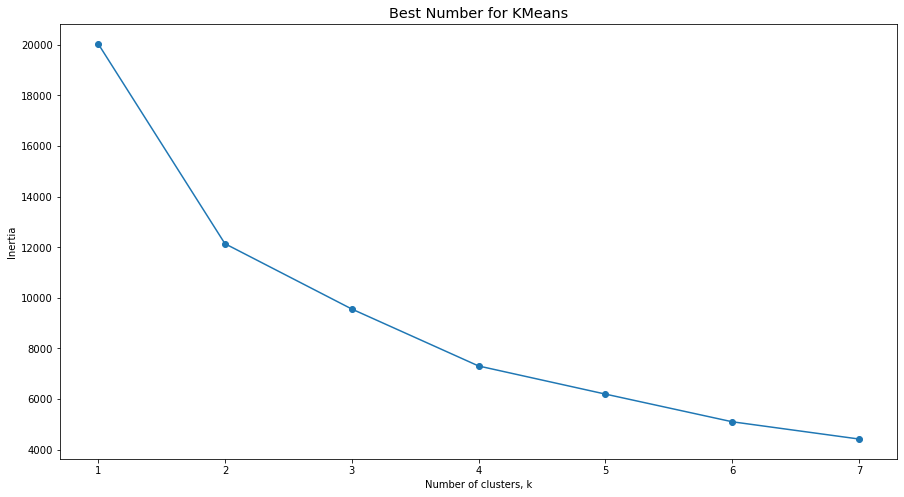

In [33]:
from sklearn.cluster import KMeans

#First : Get the Best KMeans 
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=28)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()

In [34]:
# clustering with 4 optimal number of clusters
k = KMeans(n_clusters= 4, random_state=28)
k.fit(rfm_normalized)

#Create a cluster label column in the original DataFrame
cluster_labels = k.labels_

#Calculate average RFM values and size for each cluster:
rfm_segmentation_k4 = rfm_segmentation.assign(K_Cluster = cluster_labels)

#Calculate average RFM values and sizes for each cluster:
rfm_segmentation_k4.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
             mean      mean     mean count
K_Cluster                                 
0           195.0       1.0     51.0  1291
1            88.0       2.0     47.0   715
2            95.0      27.0  24436.0     5
3            95.0       7.0    323.0   853

In [35]:
# Assigning the label

rfm_df['Cluster_Id'] = k.labels_
rfm_df.head(20)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Cluster_Id
CustomerID,,,,,,,,
12747.0,109,5,191.85,3,4,4,344,3
12748.0,70,96,1054.43,4,4,4,444,3
12749.0,130,3,67.00,2,3,3,233,0
12820.0,74,1,15.00,4,1,1,411,1
12821.0,214,1,19.92,1,1,2,112,0
12822.0,70,2,30.80,4,2,2,422,1
12823.0,74,3,1224.00,4,3,4,434,3
12826.0,71,2,37.30,4,2,3,423,1
12828.0,99,3,74.10,3,3,3,333,3


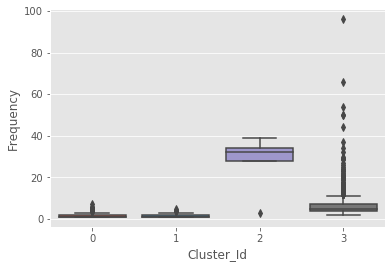

In [36]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_df)

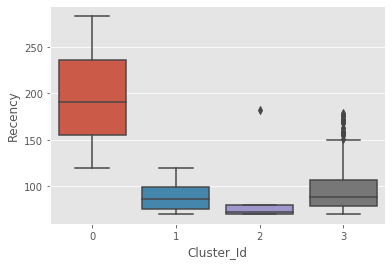

In [37]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_df)

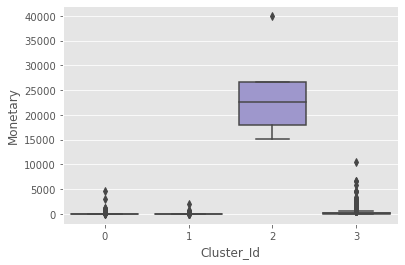

In [38]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Monetary', data=rfm_df)

In [39]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  218
Loyal Customers:  687
Big Spenders:  716
Almost Lost:  52
Lost Customers:  5
Lost Cheap Customers:  278


In [40]:
rfm_df.to_csv('Customer_Segmentation_rfm.csv')